<a href="https://colab.research.google.com/github/nimendra-ag/Face_Mask_Annotation_Assignment/blob/main/Face_Mask_Annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q albumentations

In [2]:
from __future__ import annotations

In [3]:
import albumentations as A

In [4]:
from pathlib import Path
from typing import NamedTuple, Optional

from PIL import Image

import gdown
import numpy as np
import matplotlib.pyplot as plt

import cv2
import albumentations as A

In [5]:
image = cv2.imread('/content/image.jpg')

In [6]:
print(image)

[[[163 160 145]
  [163 160 145]
  [163 160 145]
  ...
  [118  96  78]
  [118  96  78]
  [118  96  78]]

 [[164 161 146]
  [164 161 146]
  [164 161 146]
  ...
  [118  96  78]
  [118  96  78]
  [118  96  78]]

 [[165 162 147]
  [165 162 147]
  [165 162 147]
  ...
  [118  96  78]
  [118  96  78]
  [118  96  78]]

 ...

 [[142 132 102]
  [141 131 101]
  [140 130 100]
  ...
  [211 191 173]
  [211 191 173]
  [211 191 173]]

 [[142 132 102]
  [142 132 102]
  [142 132 102]
  ...
  [212 192 174]
  [212 192 174]
  [212 192 174]]

 [[142 132 102]
  [142 132 102]
  [143 133 103]
  ...
  [212 192 174]
  [212 192 174]
  [212 192 174]]]


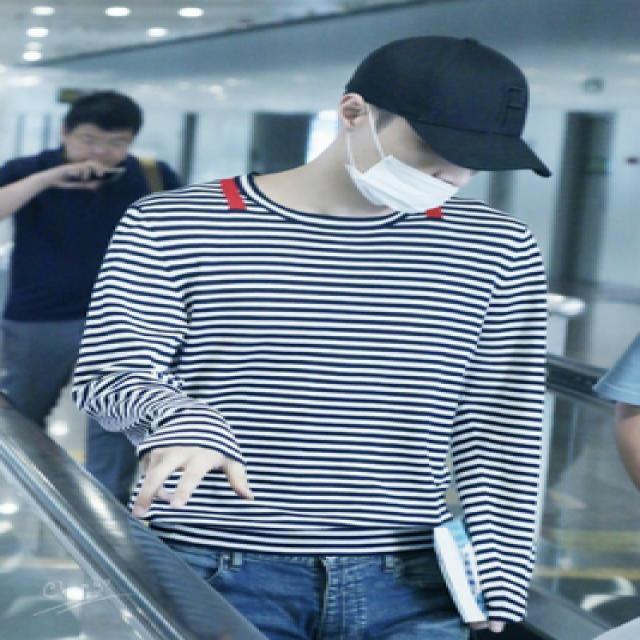

In [7]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)

In [8]:
class BoundingBox(NamedTuple):
    x_center: float
    y_center: float
    x_width: float
    y_height: float
    img_shape: int

    @staticmethod
    def from_list(box: list[float]) -> BoundingBox:
        return BoundingBox(x_center=box[0], y_center=box[1], x_width=box[2], y_height=box[3], img_shape=box[4])

    @staticmethod
    def from_list_of_boxes(boxes: list[list[float]]) -> list[BoundingBox]:
      bboxes: list(BoundingBox)=[]
      for b in boxes:
        bboxes.append(BoundingBox.from_list(b))
      return bboxes

In [9]:
# Helps to display image
# and the bounding boxes on the various objects

def bbox_to_matplotlib_rect(bbox: BoundingBox, color: str):
    """Convert bounding box to matplotlib format."""
    return plt.Rectangle(
        xy=((bbox.x_center-bbox.x_width/2)*bbox.img_shape, (bbox.y_center-bbox.y_height/2)*bbox.img_shape),
        width=bbox.x_width*bbox.img_shape,
        height=bbox.y_height*bbox.img_shape,
        fill=False,
        edgecolor=color,
        linewidth=3,
    )

def add_box_to_figure(figure, bbox: BoundingBox, color: str):
    p = figure.axes.add_patch(bbox_to_matplotlib_rect(bbox, color))
    return p

def make_image_figure_with_bboxes(
    image: np.ndarray,
    bounding_boxes: list[BoundingBox]
):

    plt.figure(figsize=(16, 10))

    figure = plt.imshow(image)

    colors = ["blue"] * len(bounding_boxes)

    # add these anchor boxes we have
    for idx, c in enumerate(colors):
        patch = add_box_to_figure(figure, bounding_boxes[idx], c)


    plt.xlim((0, image.shape[1]))
    plt.ylim((image.shape[0], 0))

    plt.show()


In [10]:
type(image)

numpy.ndarray

In [11]:

image_height, image_width, _ = image.shape
boxes = [
    BoundingBox(x_center=0.6390625, y_center=0.2984375, x_width=0.17421875, y_height=0.1, img_shape=image_height),
    # BoundingBox(x_min=53, y_min=356, x_max=185, y_max=411)
]


image_height, image_width

(640, 640)

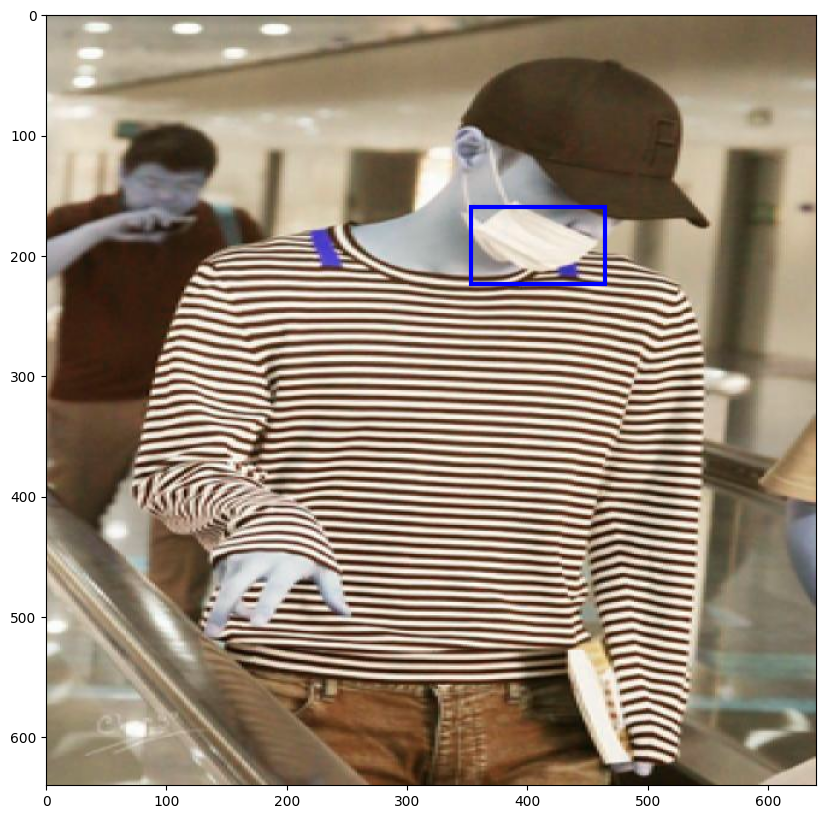

In [12]:
make_image_figure_with_bboxes(image, boxes)

In [13]:
import zipfile
import os
import shutil

zipped_data = '/content/train.zip'
unzipped_data = ''

with zipfile.ZipFile(zipped_data, 'r') as zip_ref:
    zip_ref.extractall(unzipped_data)

In [19]:
images_folder = '/content/train/images'

images = []

for file in os.listdir('/content/train/images'):
  img = cv2.imread(os.path.join(images_folder, file))
  if img is None:
    print(file)
  else:
    images.append(img)

In [15]:
images

[array([[[112,  64,  28],
         [111,  63,  27],
         [111,  63,  27],
         ...,
         [135, 128, 135],
         [137, 130, 137],
         [139, 132, 139]],
 
        [[111,  63,  27],
         [110,  62,  26],
         [110,  62,  26],
         ...,
         [135, 128, 135],
         [137, 130, 137],
         [139, 132, 139]],
 
        [[109,  61,  25],
         [109,  61,  25],
         [109,  61,  25],
         ...,
         [136, 129, 136],
         [138, 131, 138],
         [139, 132, 139]],
 
        ...,
 
        [[118,  91,  94],
         [117,  90,  93],
         [116,  89,  92],
         ...,
         [ 33,  33,  33],
         [ 33,  33,  33],
         [ 33,  33,  33]],
 
        [[115,  88,  91],
         [114,  87,  90],
         [114,  87,  90],
         ...,
         [ 33,  33,  33],
         [ 33,  33,  33],
         [ 33,  33,  33]],
 
        [[113,  86,  89],
         [113,  86,  89],
         [113,  86,  89],
         ...,
         [ 33,  33,  33],
  

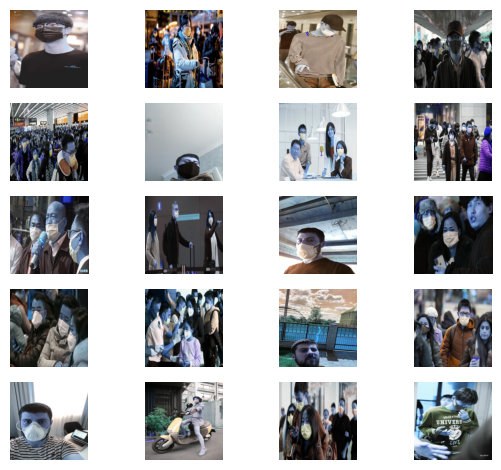

In [16]:
for i, img in enumerate(images):
  plt.subplot(5, 4, i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.tight_layout()

In [65]:
class AnnotationFile():
  def __init__(self, file_path:str):
    self.bounded_boxes_in_file:list[BoundingBox]
    self.file_path=file_path

In [72]:
labels_flies = os.listdir(labels_folder)
for x in labels_flies:
  print(x)

maksssksksss99_png.rf.1e31b126b88a64736eeb23dcfbb8dff2.txt
maksssksksss91_png.rf.bcd5c15559fbd66d687b76789843e835.txt
maksssksksss86_png.rf.26a7fd76ef178e63fb62111a908bbcb3.txt
maksssksksss87_png.rf.ce69c1ce1133f93ed8fcf00b89a122f9.txt
maksssksksss96_png.rf.7694bf0a558dd70cffbfb217c25cf90f.txt
maksssksksss85_png.rf.e2414c6506e82457bcf9ba663fbecac7.txt
maksssksksss90_png.rf.0db8100c61d1a4866a69eed39176e320.txt
maksssksksss9_png.rf.afd67a465f4b81e7a84c2f41603be122.txt
maksssksksss98_png.rf.02cc6cf91c43a40cd1c2448af87bf8ca.txt
maksssksksss850_png.rf.68ca839956de575978247d84de9aa4b2.txt
maksssksksss92_png.rf.724cfae4bed1444719a7f767cf601768.txt
maksssksksss93_png.rf.2a8250f12ef88abbee9fccd5f5cbdad8.txt
maksssksksss852_png.rf.93cec8a82e2df7f158f4b950922a06cf.txt
maksssksksss83_png.rf.c0ac4cca7ce554ccf6ed696fa747a656.txt
maksssksksss95_png.rf.9ca4a55b70fe3a419c1efa10cb15abed.txt
maksssksksss94_png.rf.cc1e77004da21c3d9099cd859e5856ee.txt
maksssksksss89_png.rf.87d9f8cf1ec692c8c835a323e6f09fe6.

In [73]:
annotation_files: list[AnnotationFile] = []
for i, file in enumerate(sorted(os.listdir(labels_folder))):
  print("new file", i+1)
  file_path = os.path.join(labels_folder, file)
  annotation_file = AnnotationFile(file_path)
  with open(file_path, "r") as file:
    print("opend file", file_path)
    lines = []
    lines = file.readlines()
    if lines == []:
      print("empty file")
    else:
      bounding_boxes:list[BoundingBox] = []
      for line in lines:
        # print("new line")
        values = line[2:]
        # print(values)
        box = list(map(float, values.split()))
        bounding_boxes.append(box)
      annotation_file.bounded_boxes_in_file = bounding_boxes
      annotation_files.append(annotation_file)

new file 1
opend file /content/train/labels/maksssksksss83_png.rf.c0ac4cca7ce554ccf6ed696fa747a656.txt
new file 2
opend file /content/train/labels/maksssksksss850_png.rf.68ca839956de575978247d84de9aa4b2.txt
new file 3
opend file /content/train/labels/maksssksksss851_png.rf.86f319a9e8e94c3a86be3bab47d0412a.txt
new file 4
opend file /content/train/labels/maksssksksss852_png.rf.93cec8a82e2df7f158f4b950922a06cf.txt
new file 5
opend file /content/train/labels/maksssksksss85_png.rf.e2414c6506e82457bcf9ba663fbecac7.txt
new file 6
opend file /content/train/labels/maksssksksss86_png.rf.26a7fd76ef178e63fb62111a908bbcb3.txt
new file 7
opend file /content/train/labels/maksssksksss87_png.rf.ce69c1ce1133f93ed8fcf00b89a122f9.txt
new file 8
opend file /content/train/labels/maksssksksss88_png.rf.6b698f83db6a6de925efc4b7ccab7a0e.txt
new file 9
opend file /content/train/labels/maksssksksss89_png.rf.87d9f8cf1ec692c8c835a323e6f09fe6.txt
new file 10
opend file /content/train/labels/maksssksksss90_png.rf.0db

In [69]:
for box in annotation_files[1].bounded_boxes_in_file:
  print(box)
print(annotation_files[1].file_path)

[0.3421875, 0.39609375, 0.15078125, 0.20703125]
[0.67734375, 0.4984375, 0.14140625, 0.2234375]
[0.7875, 0.6625, 0.13828125, 0.25078125]
[0.21171875, 0.14375, 0.03203125, 0.109375]
[0.57421875, 0.07890625, 0.10859375, 0.1578125]
/content/train/labels/maksssksksss91_png.rf.bcd5c15559fbd66d687b76789843e835.txt


In [60]:
annotation_files[0].bounded_boxes_in_file

[[0.30703125, 0.5015625, 0.1453125, 0.1875],
 [0.5375, 0.46953125, 0.175, 0.23671875],
 [0.79375, 0.68515625, 0.11875, 0.33984375]]

In [74]:
images = sorted(os.listdir(images_folder))
for file in images:
  print(file)

maksssksksss83_png.rf.c0ac4cca7ce554ccf6ed696fa747a656.jpg
maksssksksss850_png.rf.68ca839956de575978247d84de9aa4b2.jpg
maksssksksss851_png.rf.86f319a9e8e94c3a86be3bab47d0412a.jpg
maksssksksss852_png.rf.93cec8a82e2df7f158f4b950922a06cf.jpg
maksssksksss85_png.rf.e2414c6506e82457bcf9ba663fbecac7.jpg
maksssksksss86_png.rf.26a7fd76ef178e63fb62111a908bbcb3.jpg
maksssksksss87_png.rf.ce69c1ce1133f93ed8fcf00b89a122f9.jpg
maksssksksss88_png.rf.6b698f83db6a6de925efc4b7ccab7a0e.jpg
maksssksksss89_png.rf.87d9f8cf1ec692c8c835a323e6f09fe6.jpg
maksssksksss90_png.rf.0db8100c61d1a4866a69eed39176e320.jpg
maksssksksss91_png.rf.bcd5c15559fbd66d687b76789843e835.jpg
maksssksksss92_png.rf.724cfae4bed1444719a7f767cf601768.jpg
maksssksksss93_png.rf.2a8250f12ef88abbee9fccd5f5cbdad8.jpg
maksssksksss94_png.rf.cc1e77004da21c3d9099cd859e5856ee.jpg
maksssksksss95_png.rf.9ca4a55b70fe3a419c1efa10cb15abed.jpg
maksssksksss96_png.rf.7694bf0a558dd70cffbfb217c25cf90f.jpg
maksssksksss97_png.rf.b10e9cf00c3e4cbdfaac96ea1c4fc96

In [ ]:
for i, image in enumerate(sorted(os.listdir(images_folder))):
  image_path = os.path.join(images_folder, image)
  image = cv2.imread(image_path)
  image_height, image_width, _ = image.shape
  boxes = [box for box in annotation_files[i].bounded_boxes_in_file]
  make_image_figure_with_bboxes(image, boxes)

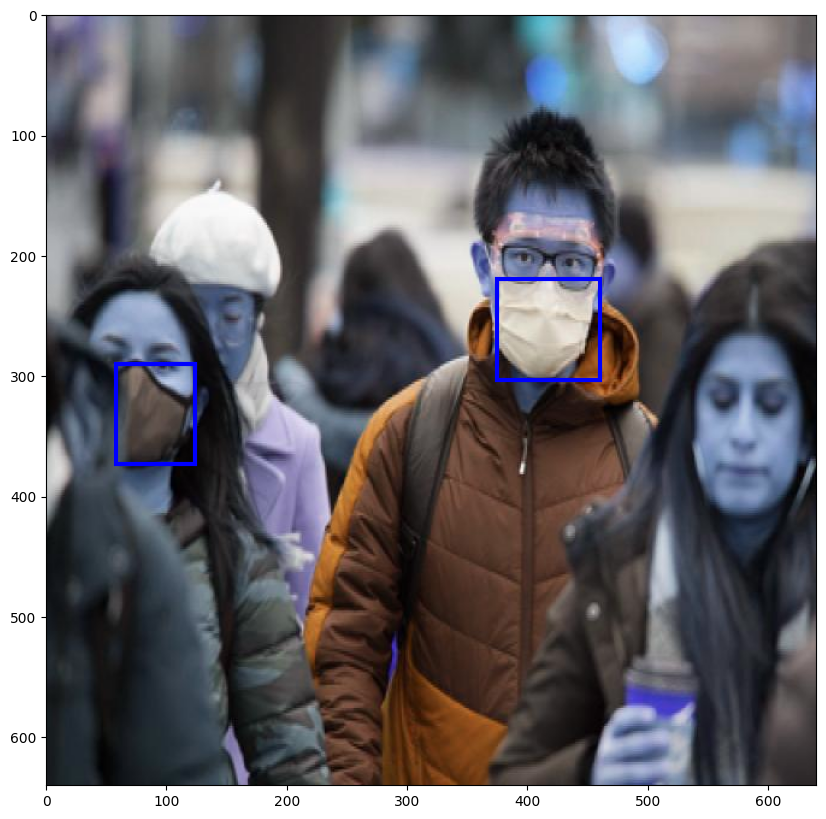

In [81]:
i = 5
image = sorted(os.listdir(images_folder))[i]
image_path = os.path.join(images_folder, image)
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape
boxes = []
for box in annotation_files[i].bounded_boxes_in_file:
  boxes.append(BoundingBox(x_center=box[0], y_center=box[1], x_width=box[2], y_height=box[3], img_shape=image_height))

make_image_figure_with_bboxes(image, boxes)